In [1]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is B861-330F

 Directory of C:\Users\Helena\Documents\BCS\BCS 2ND YEAR\TERM 2\DSCI 320\Project\archive

2025-03-03  04:39 PM    <DIR>          .
2025-03-03  04:39 PM    <DIR>          ..
2025-03-03  04:13 PM    <DIR>          .ipynb_checkpoints
2025-03-03  04:13 PM            14,490 EDA_music_mental.ipynb
2025-03-03  04:39 PM           140,533 music-mental-health-eda.ipynb
2025-03-03  04:05 PM           172,563 mxmh_survey_results.csv
               3 File(s)        327,586 bytes
               3 Dir(s)  19,092,963,328 bytes free


In [2]:
import pandas as pd

df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Many questions, such as all Frequency questions, were mandatory and have no null values.

# Respondents' background
## 1. Music

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

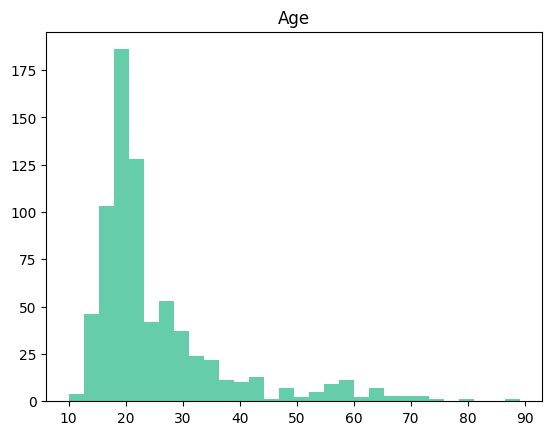

In [4]:
import numpy as np

df.hist(['Age'], bins=30, color='mediumaquamarine', grid=False)

In [5]:
df['Age'].value_counts().loc[lambda x : x>50]

Age
18.0    85
19.0    61
17.0    59
21.0    52
Name: count, dtype: int64

In [6]:
df['Age'].max()

np.float64(89.0)

Most respondents are in their late teens or early twenties. A single 89 year old respondent is an interesting outlier!

> The age distribution makes sense, as the survey used to collect data was advertised in discussion forums and social media sites that target this demographic. This may introduce age bias, i.e. influencing which music genres are most popular.

Text(0, 0.5, '')

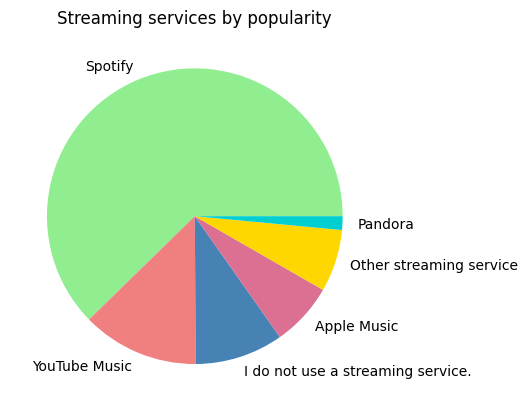

In [7]:
import matplotlib.pyplot as plt

s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

In [8]:
df['Primary streaming service'].value_counts(normalize=True)

Primary streaming service
Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: proportion, dtype: float64

C:\Users\Helena\AppData\Local\Temp\ipykernel_2176\1151908852.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",


Text(0.5, 1.0, 'Streaming services by Age')

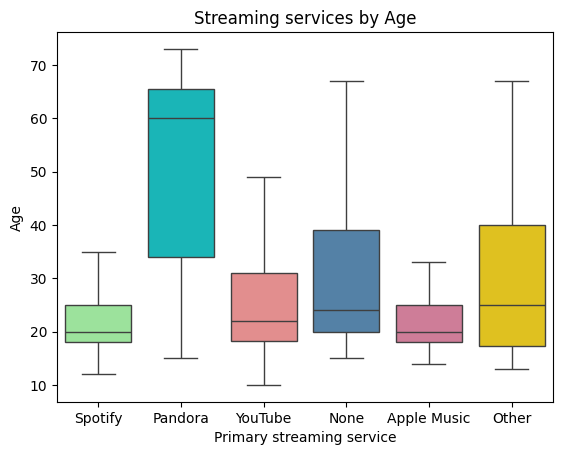

In [9]:
# !python -m pip install seaborn
import seaborn as sns

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

In [10]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           24.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

Spotify is the most popular music streaming service, accounting for 62% of all respondents. Spotify, along with Apple Music, also has a marginally younger userbase than other streaming platforms. Pandora has the oldest user base by far, with the median user age at ~60 years old.

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

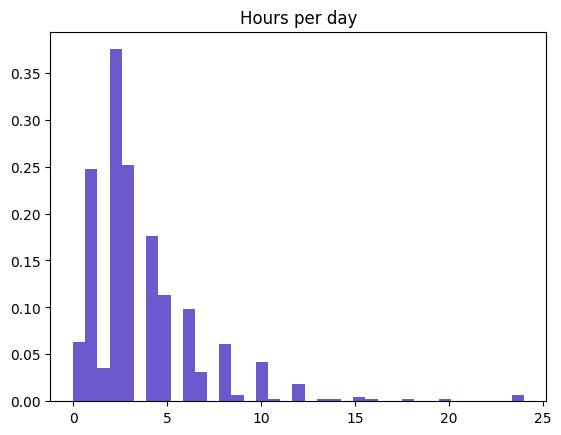

In [11]:
df.hist(['Hours per day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [12]:
df['Hours per day'].value_counts().loc[lambda x : x>100]

Hours per day
2.0    173
3.0    120
1.0    117
Name: count, dtype: int64

The vast majority of respondents listen to music between 0-5 hours per day. After this threshold, the number of respondents that listen to music 5+ hours a day decreases almost exponentially. There are a few respondents that claim to listen to music 24 hours a day.

<Axes: ylabel='count'>

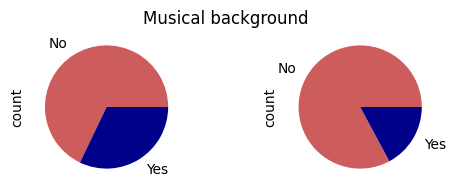

In [13]:
fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

Most respondents do not play an instrument. It is even rarer for a respondent to compose music.

In [17]:
df.infer_objects(copy=False)
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

TypeError: Cannot convert [['8/27/2022 19:57:31' '8/27/2022 21:28:18' '8/27/2022 21:40:40' ...
  '10/30/2022 13:15:26' '11/3/2022 23:24:38' '11/9/2022 1:55:20']
 ['Pandora' 'Spotify' 'YouTube' ... 'Spotify' 'Other' 'YouTube']
 ['Rock' 'Video game music' 'Jazz' ... 'R&B' 'Rap' 'Hip hop']
 ...
 ['Rarely' 'Very frequently' 'Never' ... 'Sometimes' 'Rarely' 'Rarely']
 [nan 'No effect' 'Improve' ... 'Improve' 'Improve' 'Improve']
 ['I understand.' 'I understand.' 'I understand.' ... 'I understand.'
  'I understand.' 'I understand.']] to numeric

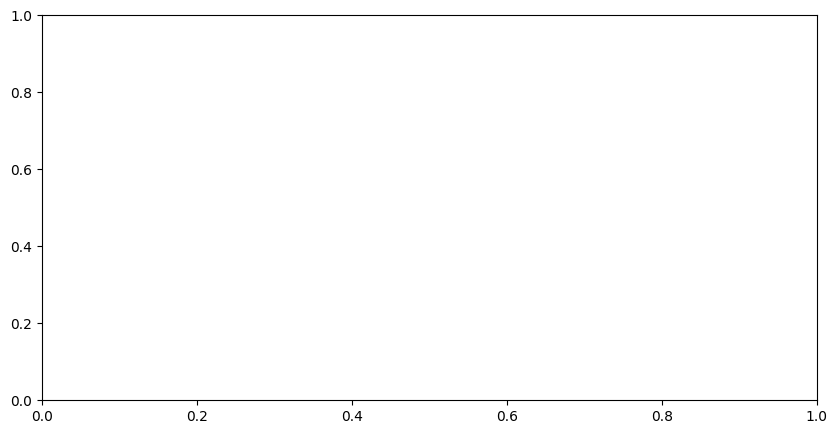

In [18]:
labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
b3 = ax.bar(x, df[(df.Composer == 0)].median()[-4:], width, color = 'cornflowerblue', label = "Non Composer")
b4 = ax.bar(x+width, df[(df.Composer == 1)].median()[-4:], width, color = 'darkblue', label = "Composer")

ax.set_ylim([0, 8])
ax.set_ylabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

Instrumentalists and composers have slightly higher MH rankings. However, OCD rankings are low regardless of musical background.

In [19]:
corr_m = df.corr()
corr_m1 = corr_m.iloc[:-5 , :-5]

mask = np.triu(corr_m1)

sns.heatmap(corr_m1, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

ValueError: could not convert string to float: '8/27/2022 19:29:02'

**Strong linear trends**

As expected, there is a a significant correlation between individuals that play music and individuals that compose music. Similarly, there is also a strong relationship between the total hours listening per day and hours listening while working.

**Weaker linear trends: exploratory respondents**

- The more hours spent listening to music, the more likely an individual actively explores new music.
- Individuals that listen to music while working are more likely to explore new music and listen to music in different languages.
- Individuals that listen to music in foreign languages are more likely to explore new music.
- Older individuals are less inclined to explore new music.

## 2. Mental health

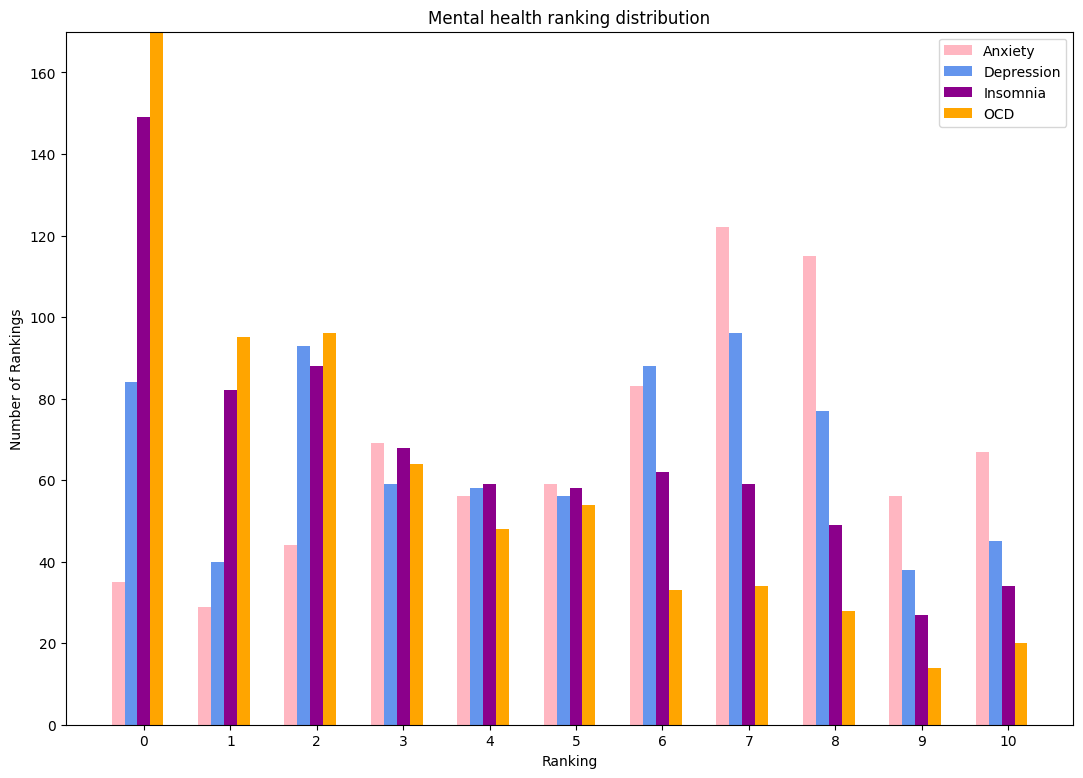

In [20]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [21]:
# get value for number of OCD rankings at 0

max(disorder_count)

np.int64(248)

In [22]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


Elevated rankings for depression and anxiety are very common, averaging rankings of 5 and 6 respectively. Between each ranking, popularity also seems to move in the same direction (i.e., from rankings 1 to 2, the popularity of these rankings increases for both anxiety and depression.) Interestingly (albeit concerningly), a given individual is more likely to rank depression at 10 than 0.

Insomnia is somewhat common and distributed more fairly outside of the 0 ranking. However, insomnia rankings do demonstrate a downward trend in popularity as the rankings increase.

With 0 as its mode, OCD is the least common disorder. Similarly to the insomnia rankings, as OCD rankings increase, they tend to decrease in popularity.

### Listening time & MH

In [23]:
anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean()[1]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with extreme MH rankings")
plt.xlim(3,5.5)
plt.show()


TypeError: can only concatenate str (not "int") to str

An extreme MH ranking is defined as a ranking of 9 or 10. Extreme insomniacs rack up slightly more listening time compared to individuals with extreme rankings in other categories. Individuals with extreme OCD have a slightly lower listening time. However, these differences may be considered negligible.

Take note that individuals may exist in multiple extreme categories if they answered a 9 or 10 for multiple MH categories.

In [ ]:
anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
insomnia_extreme2 = df.loc[(df['Insomnia'] < 3)].mean()[1]
ocd_extreme2 = df.loc[(df['OCD'] < 3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low MH rankings")
plt.xlim(3,4)
plt.show()


A low MH ranking is defined as a ranking of 0, 1, or 2. Interestingly enough, individuals with low insomnia saw a noteworthy decline in average hours listened compared to their extreme counterparts. This was also the case for individuals with low depression.

Take note that individuals may exist in multiple categories if they answered a 0, 1 or 2 for multiple MH categories. Also, take note that the hours scale on this figure is different than the preceding figure.

In [24]:
corr_m2 = corr_m.iloc[8: , 8:]
mask = np.triu(corr_m2)

sns.heatmap(corr_m2, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

NameError: name 'corr_m' is not defined

All four disorders show significant overlap with each other, with depression and anxiety witnessing the strongest linear correlation. This agrees with our observations from the "Mental health ranking distribution" chart.

OCD is somewhat related to the other categories, but the correlation matrix does not imply as strong of a relationship.

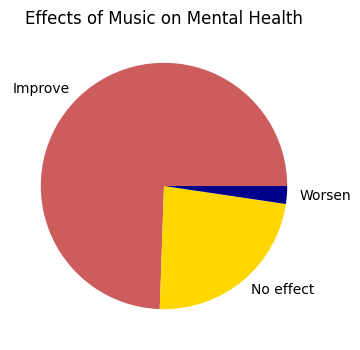

In [25]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');

In [26]:
effects

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

The majority of respondents find that music has a positive impact on their mental health. Of the remaining respondents, only 15 individuals reported music having a negative impact.

# Music genres

Text(0, 0.5, '')

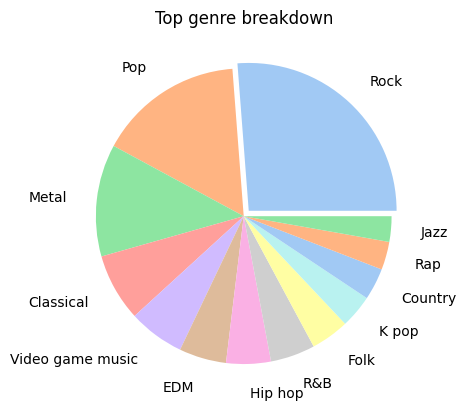

In [27]:
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")

Rock is the most popular genre, being selected as an individual's favorite genre 1 out of 4 times. In terms of popularity, rock is followed by pop and metal. Lofi, Gospel, and Latin music were selected less than 0.14% of the time and do not appear in the above pi chart.

For a genre breakdown by listening frequency, please see the "(In Depth) Genres by Popularity" figure.

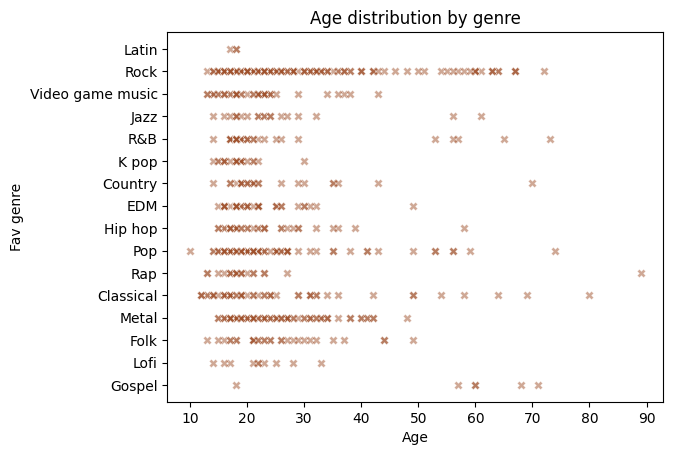

In [28]:
# age and genre

sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');


Rock has the most diverse range of ages. Classical and Pop listeners also have a wider range of ages compared to other genres. Some music genres, such as K pop and Lofi appear to attract a more specific and younger age group.

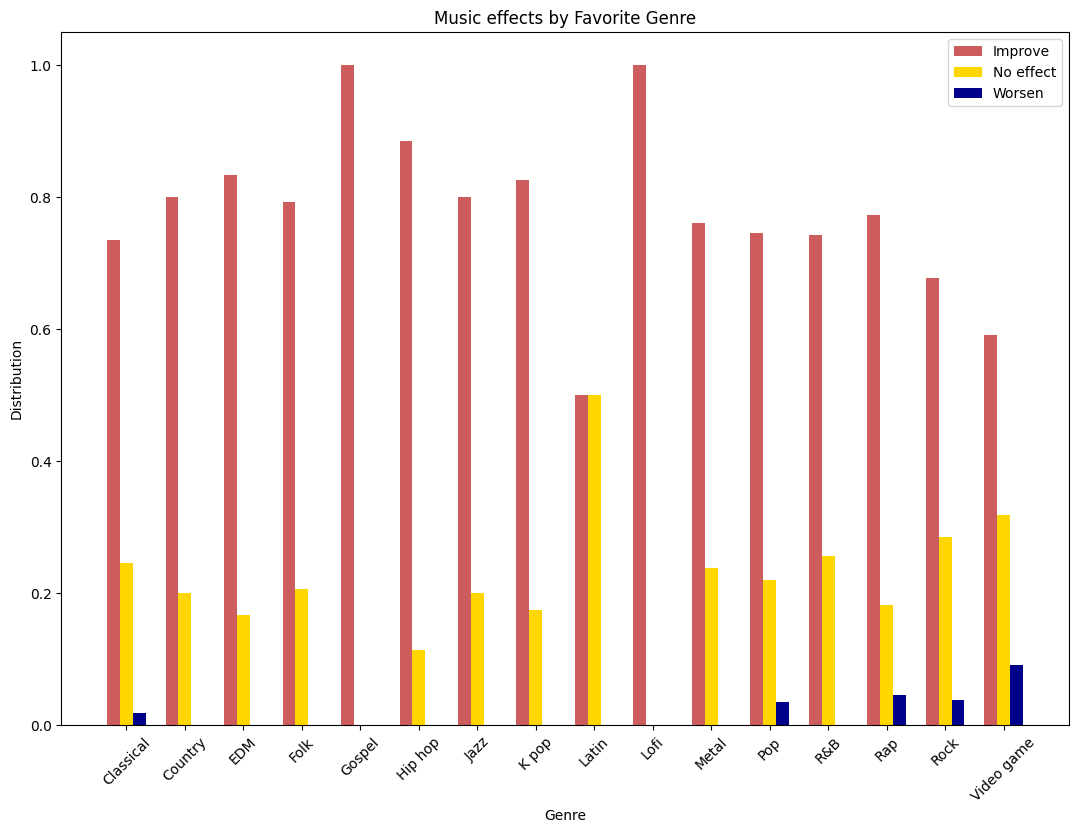

In [29]:
df.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = df['Fav genre'].unique()
g_all.sort()
fg_df = df.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-width, imp_dist, width, label="Improve", color = 'indianred')
b2 = ax.bar(x, no_eff_dist, width, label="No effect", color = 'gold')
b3 = ax.bar(x+width, wors_dist, width, label="Worsen", color = 'darkblue')

plt.title("Music effects by Favorite Genre")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()

- Regardless of genre, the vast majority of respondents agree that music has a positive impact on mental health. This is corroborated by the "Effects of Music on Mental Health" figure.
- Individuals who selected Gospel and Lofi as their favorite genre unanimously find music beneficial.
- Individuals who selected Video Game Music as their favorite genre have the most diverse distribution of responses. Roughly 40% of these respondents did not find music beneficial at all,  with 10% of respondents reporting a negative impact on their mental health.
- The only other respondents that found music detrimental were respondents who selected Classical, Pop, Rap, or Rock music as their top genre.



### BPM

In [30]:
print(df['BPM'].max())
print(df['BPM'].min())

999999999.0
0.0


The survey system isn't perfect. Online trolls claiming to listen to music with 999999999 BPM may mess up data.

In [31]:
# filter out noise by creating upper and lower bounds

df = df[(df.BPM < 500) & (df.BPM > 20)]
print(df['BPM'].max())
print(df['BPM'].min())

220.0
40.0


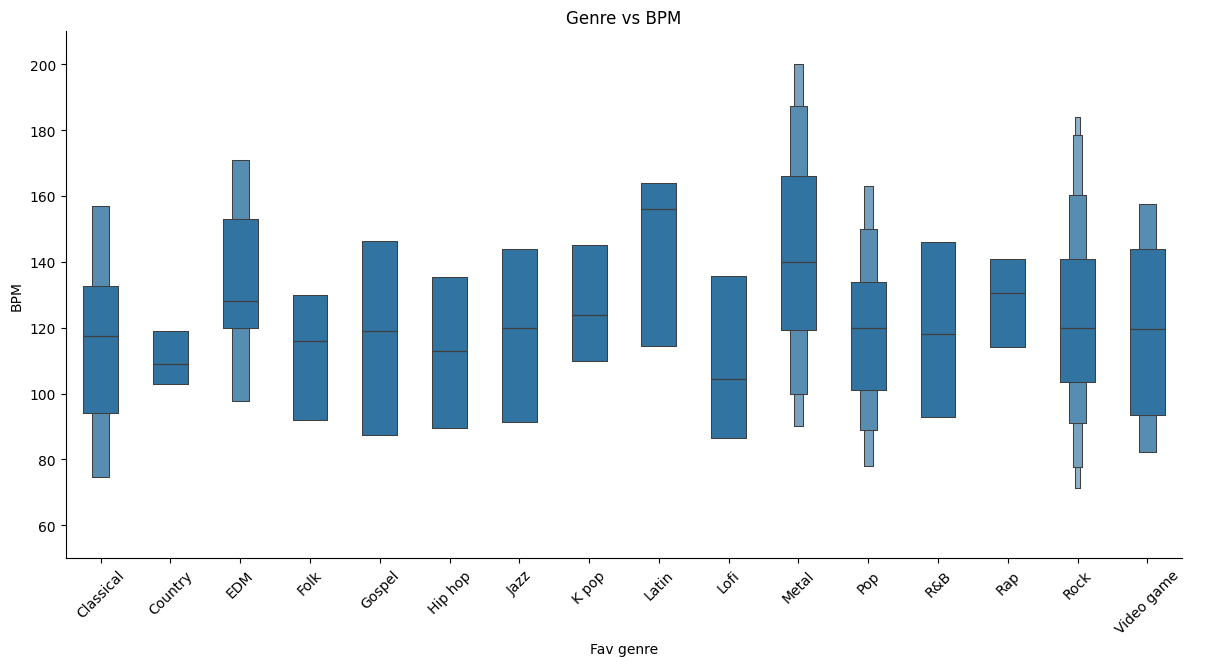

In [32]:
sns.catplot(
    data=df.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5,
    showfliers=False,
)

plt.xticks(rotation = 45)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

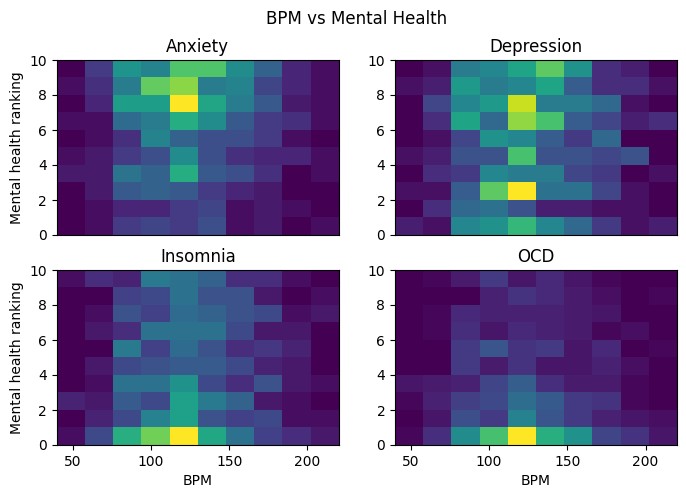

In [33]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);

In [34]:
df['MH Score'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

C:\Users\Helena\AppData\Local\Temp\ipykernel_2176\367325339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MH Score'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']


In [35]:
df.nsmallest(50, ['MH Score'])['BPM'].mean()

np.float64(123.26)

In [36]:
df.nlargest(50, ['MH Score'])['BPM'].mean()

np.float64(122.26)

There is no clear correlation between BPM and mental health rankings.

### Genres

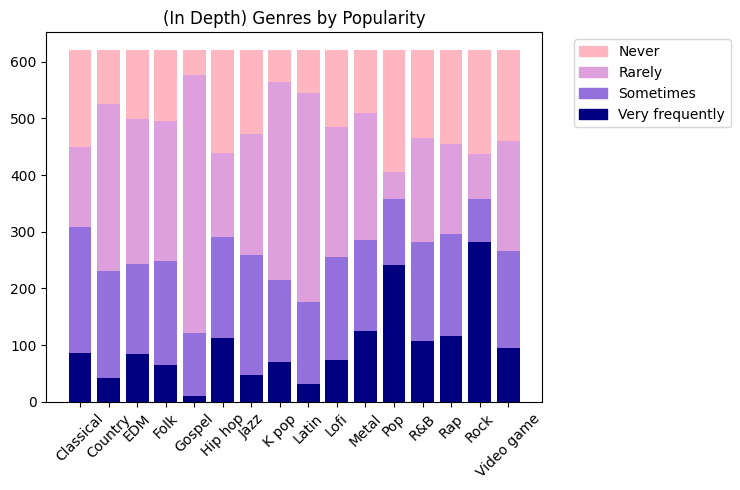

In [37]:
import matplotlib.patches as mpatches

i = 11

r_dist = []
s_dist = []
n_dist = []
vf_dist = []

while i != 27:
    freq_dist = df.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])  
    
    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    ax.bar(i, r_dist[i], label='Rare', bottom = vf_dist[i] + s_dist[i], color = "plum")
    ax.bar(i, s_dist[i], label='Sometimes', bottom = vf_dist[i], color = "mediumpurple")
    ax.bar(i, n_dist[i], label='Never', bottom=vf_dist[i] + s_dist[i] + r_dist[i], color = "lightpink")
    ax.bar(i, vf_dist[i], label='Very frequently', color = "navy")

ax.set_title('(In Depth) Genres by Popularity')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(g_all)
plt.xticks(rotation = 45)

patch1 = mpatches.Patch(color='lightpink', label='Never')
patch2 = mpatches.Patch(color='plum', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='navy', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [38]:
import itertools

med_list = []
med_list2 = []
med_list3 = []
med_list4 = []

df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        [0, 1, 2, 3], inplace=True)

for i in range (11, 27):
    freq_genre = df.columns[i]
    med_list.append(pd.pivot_table(df, values='Anxiety', index=freq_genre, aggfunc="median").values.tolist())
    med_list2.append(pd.pivot_table(df, values='Depression', index=freq_genre, aggfunc="median").values.tolist())
    med_list3.append(pd.pivot_table(df, values='Insomnia', index=freq_genre, aggfunc="median").values.tolist())
    med_list4.append(pd.pivot_table(df, values='OCD', index=freq_genre, aggfunc="median").values.tolist())

def m_vs_gfreq(mlist, fig_name, bd1, bd2):

    r_dist = []
    s_dist = []
    n_dist = []
    vf_dist = []

    for i in range (0, 16):
        n_dist.append(mlist[i][0])
        r_dist.append(mlist[i][1])  
        s_dist.append(mlist[i][2])  
        vf_dist.append(mlist[i][3])  

    labels = g_all
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10, 4))

    b1 = ax.bar(x-2*width, list(itertools.chain(*n_dist)), width, label="Never", color = 'lightpink')
    b2 = ax.bar(x-width, list(itertools.chain(*r_dist)), width, label="Rarely", color = 'plum')
    b3 = ax.bar(x, list(itertools.chain(*s_dist)), width, label="Sometimes", color = 'mediumpurple')
    b4 = ax.bar(x+width, list(itertools.chain(*vf_dist)), width, label="Very Frequently", color = 'navy')

    ax.set_ylim(bd1, bd2)
    ax.set_ylabel('Ranking')
    ax.set_title(fig_name)
    ax.set_xticks(x, labels)
    ax.legend(loc='upper left')

    plt.xticks(rotation = 45)
    plt.show()

C:\Users\Helena\AppData\Local\Temp\ipykernel_2176\2484853109.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
C:\Users\Helena\AppData\Local\Temp\ipykernel_2176\2484853109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],


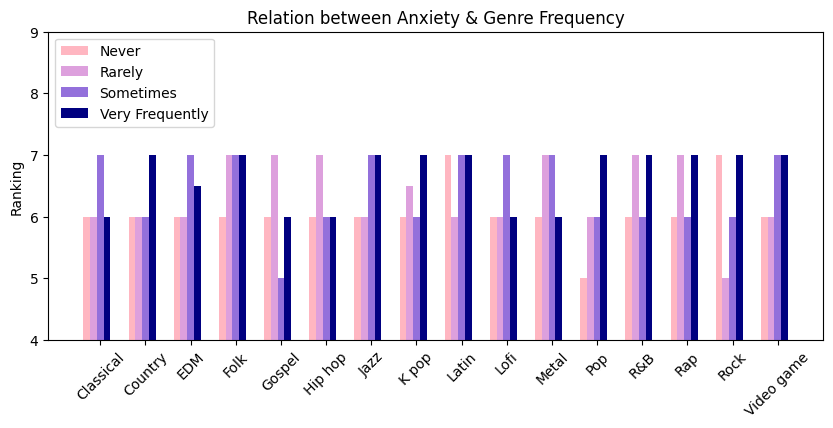

In [39]:
m_vs_gfreq(med_list, 'Relation between Anxiety & Genre Frequency', 4, 9)

- For most genres, a consistent relationship is absent or negligible.
- Very frequently listening to Country music correlates with a slightly higher anxiety ranking.
- Never listening to Folk music with a slightly lower anxiety ranking.
- The most consistent relationship is between anxiety and Pop frequency. As the frequency increases, so do anxiety rankings.
- For respondents who selected "Sometimes" or "Very Frequently" for EDM, Jazz, or Video game music, respondents also reported a higher anxiety ranking than those that selected "Rarely" or "Never."



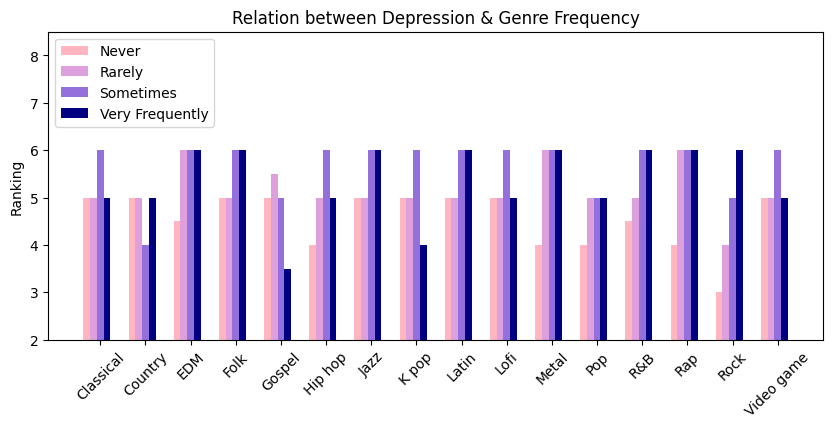

In [40]:
m_vs_gfreq(med_list2, 'Relation between Depression & Genre Frequency', 2, 8.5)

- For most genres, a consistent relationship is absent or negligible.
- Very frequently listening to Gospel music correlates with lower depression rankings.
- Never listening to EDM, Hip hop, Metal, Rap, Rock, or Pop correlates with slightly lower depression rankings.
- The most consistent relationships are between Rock frequency vs depression and R&B vs depression. In both cases, as the frequency increases, so do the depression rankings.

Let's plot Rock individually to visualize this:

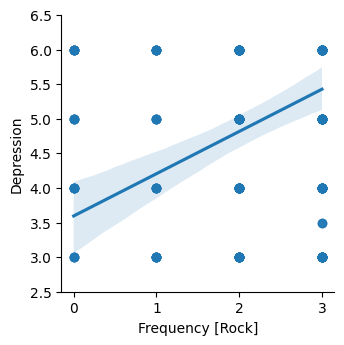

In [41]:
fig = sns.lmplot(x ='Frequency [Rock]', y ='Depression', data = df, height=3.5)
fig.set(ylim=(2.5, 6.5))

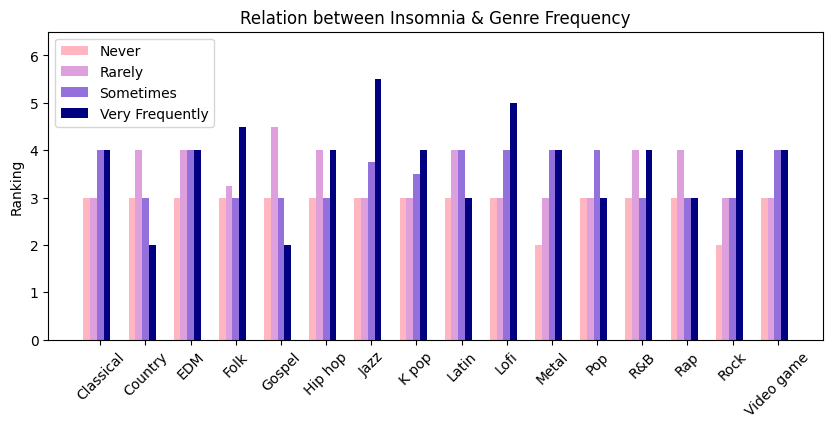

In [42]:
m_vs_gfreq(med_list3, 'Relation between Insomnia & Genre Frequency', 0, 6.5)

- For most genres, a consistent relationship is absent or negligible.
- Very frequent listeners of Country and Gospel music reported lower insomnia rankings.
- This is the opposite case for Metal, Lofi, Jazz,  Rock, and, less apparently, K Pop. For these genres, higher frequencies correlated with higher insomnia rankings.
- Very frequent listeners of Folk, Jazz, and Lofi reported the highest insomnia rankings.

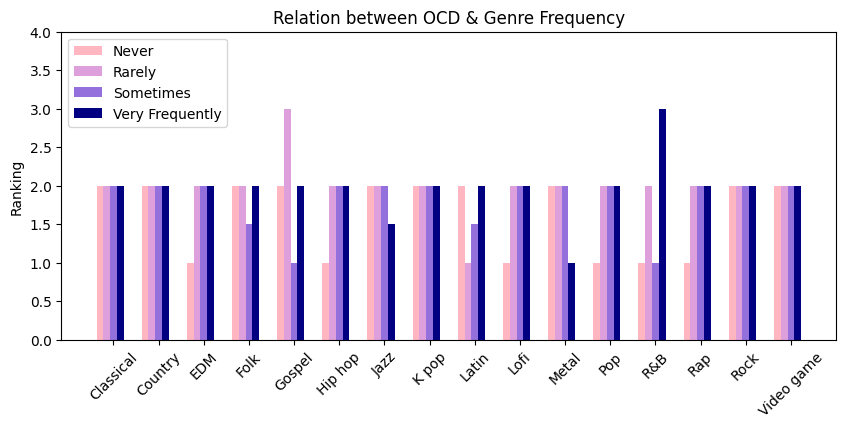

In [43]:
m_vs_gfreq(med_list4, 'Relation between OCD & Genre Frequency', 0,4)

- For most genres, a consistent relationship is absent or negligible.
- Very frequently listening to R&B correlates with a higher OCD ranking.

In [44]:
print('Favorite genres of highest combined MH scorers:')
df.nlargest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of highest combined MH scorers:


Fav genre
Rock          14
Pop            9
Metal          8
EDM            6
Classical      4
Folk           3
R&B            3
Video game     3
Lofi           3
K pop          2
Jazz           2
Country        1
Hip hop        1
Rap            1
Name: count, dtype: int64

In [45]:
print('Favorite genres of lowest combined MH scorers:')
df.nsmallest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of lowest combined MH scorers:


Fav genre
Rock          12
Metal          9
Pop            8
Classical      6
EDM            4
R&B            4
Country        4
Rap            3
K pop          3
Jazz           3
Folk           1
Video game     1
Latin          1
Gospel         1
Name: count, dtype: int64

Take note of the overall genre popularity, as outlined in the "Top genre breakdown" figure. Higher value counts for genres such as Rock, Pop, and Metal should be expected.

Considering that Latin and Gospel music accounted for a very small portion of reported favorite genres, it is noteworthy that both of these genres appear in the second list. This suggests that Latin and Gospel music may have a significant correlation with lower MH scores. This is somewhat corroborated by plots generated by the m_vs_gfreq function.

(Of course, the diminished population of Latin and Gospel music lovers means these results are more susceptible to noise.)

Country and Rap also appear more frequently for the lowest MH scorers.

On the other hand, EDM appears slightly more frequently for the highest MH scorers, which is expected as listening to EDM more frequently generally leads to higher MH scores in all categories.

It is further of interest to note that Lofi does not appear in the second list, but appears 3 times in the first. As outlined in the "Relation between Insomnia & Genre Frequency" figure, Lofi enjoyers tended to suffer more from insomnia which may explain this finding.


**Surprising results**

While it is recognized that Rock is the most popular genre, its above value counts are surprising. According to the m_vs_gfreg plots, avid Rock listeners have higher rankings for both Insomnia and Depression. Still, Rock has comparable value counts in both lists.

Similarly, listening to Jazz very frequently pointed towards higher rankings for Anxiety, Depression, and especially Insomnia. Yet, Jazz appears in both lists with similar value counts.

# Conclusions
There are numerous small patterns between music taste and mental health. However, some factors (such as BPM), do not play a significant role. Individual genres also have varying degrees of influence, which is dependent on the MH category. For example, the frequency that an individual listens to Rock is more related to Depression rankings than the frequency for Lofi. However, Lofi is related to higher Insomnia rankings.

Thus, it would be inaccurate to deem one genre to be the "most dangerous."

In [46]:
df.nlargest(1, ['MH Score'])['Fav genre']

562    Folk
Name: Fav genre, dtype: object

However, Folk music was the favorite genre for the top combined MH scorer. (Take this with a grain of salt, as a single instance does not generalize to the whole dataset.)

### Questions
This dataset could be improved. Additional questions about demographics (country, sex, etc.) might provide missing and more interesting insights. Ideally, this dataset would have more instances too.

Furthermore, I am curious about other unrepresented genres, such as Alternative music. This critique was also brought to my attention by various respondents on Discord and Reddit. In general, the survey itself had a strong Western bias, evidenced by the music genres respondents were asked about.

Finally, I would like to explore the plausibility of predicting MH from music taste or vice versa. 


### Reflection

This was my first time building my own dataset. Deciding what questions to ask and how to accumulate responses required more thought than I expected. I definitely feel inspired to publish more datasets in the future, focusing on data that is not yet publicly and readily accessible.

Building this notebook was also very fun! I learned a lot about creating meaningful visualizations and manipulating data. I want to give a special thank you to [Vincent Tu](https://www.kaggle.com/vincenttu), who inspired me to take on this project and taught me lots of new things along the way.❤️

Thanks for reading!